<a href="https://colab.research.google.com/github/Shaghayegh-Aflatounian/Churn-Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this study, our objectives are:

- To identify and visualize the key factors that contribute to customer churn.

- To build a predictive model that can: Classify whether a customer will churn or not

Ideally, develop a model that can assign a probability of churn for each customer. This would enable customer service to most effectively target their retention efforts at the customers deemed most at-risk of churning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf


# Data Exploration


In [6]:
# Importing the dataset

import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

dataset = pd.read_csv('/content/gdrive/My Drive/Github/Churn_Modelling.csv')
dataset.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Check columns and missing values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
dataset.isnull().values.any()

False

In [9]:
# Get unique counts for variables

dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Dropping the columns that do not influence the target

dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
# Review the dataset

dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


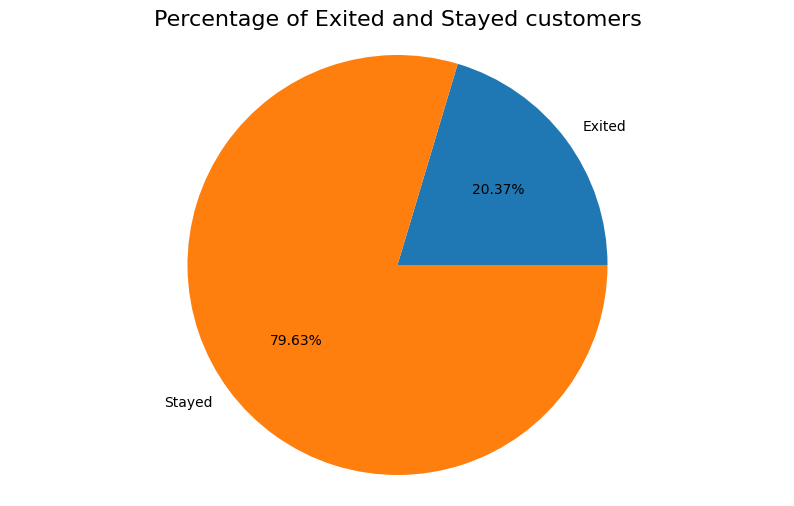

In [12]:
# Checking the percentage of exited and stayed customers to the total amount

labels = 'Exited', 'Stayed'
sizes = [dataset.Exited[dataset['Exited']==1].count(), dataset.Exited[dataset['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=0)
ax1.axis('equal')
plt.title("Percentage of Exited and Stayed customers", size = 16)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

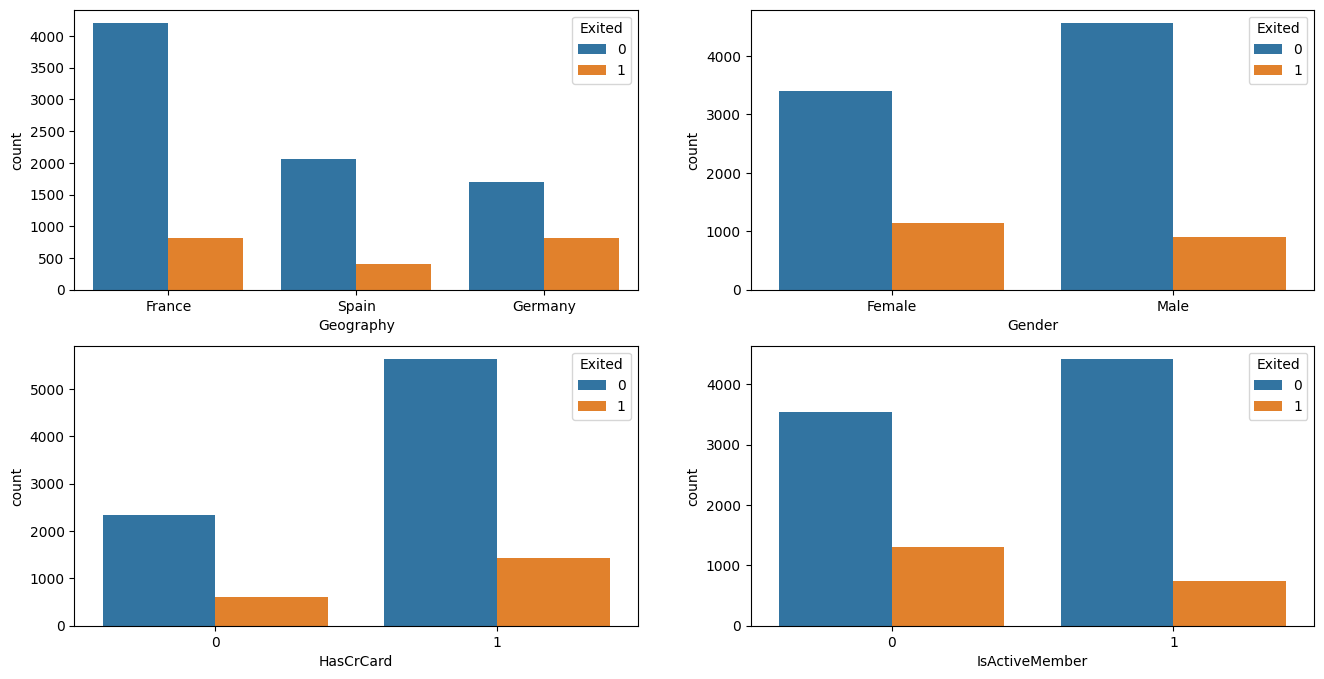

In [14]:
 # Checking the relation of target variable with categorical variables

fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

#### Here we can notice that:
#### - German clients were more ready to churn than clients in France and Spain
#### - female clients were more ready to churn than male clients
#### - there is not significant influence of having or not having a credit card on a churn rate
#### - active members were less ready to churn

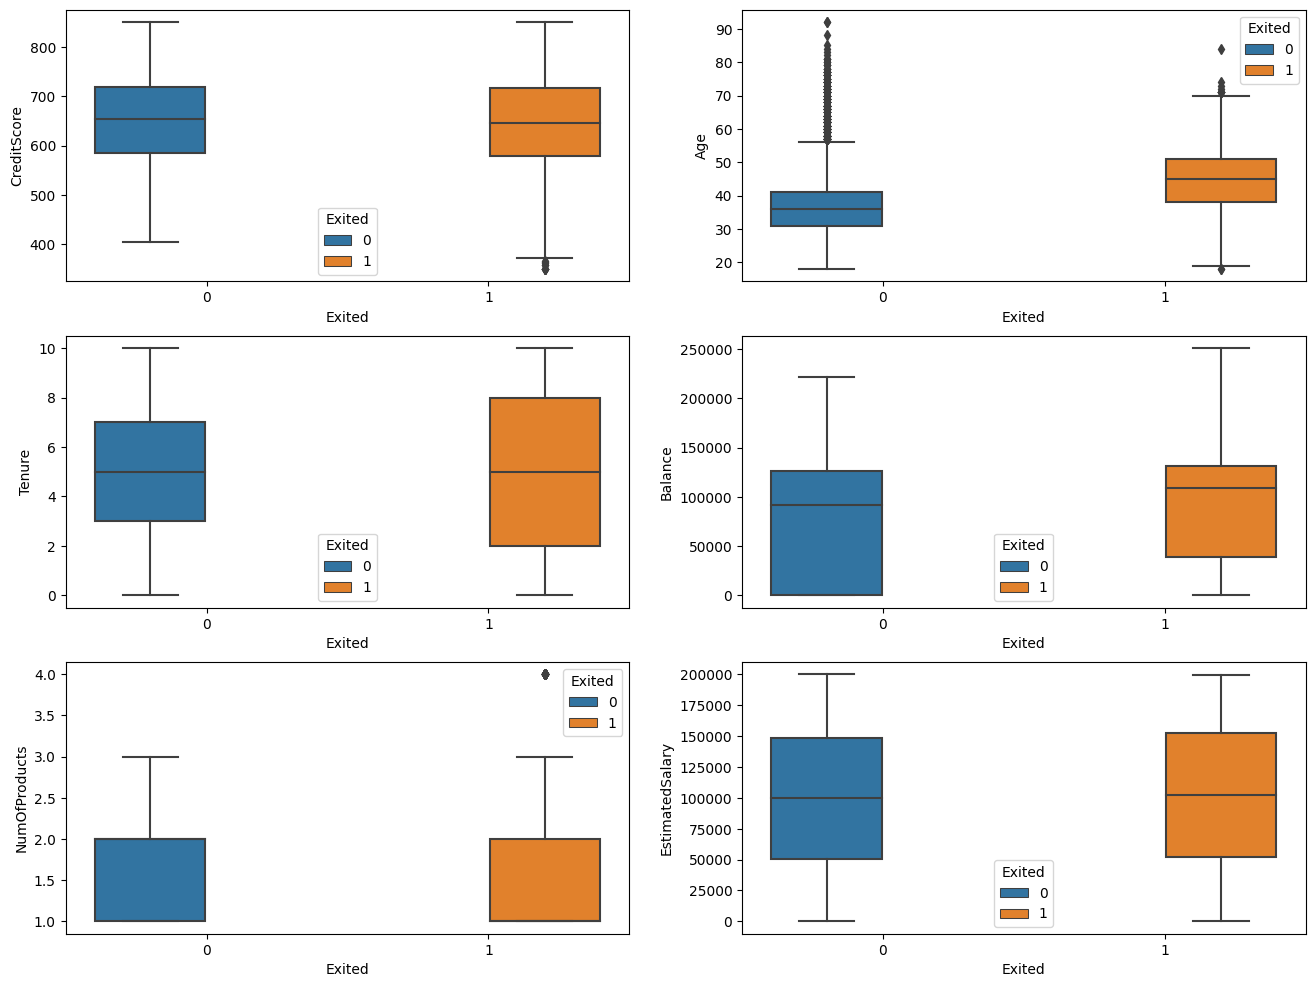

In [15]:
# Relations of target variable with the numerical data

fig, axarr = plt.subplots(3, 2, figsize=(16, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=dataset, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=dataset, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=dataset, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=dataset, ax=axarr[2][1])

plt.subplots_adjust(hspace=0.2)

##### Here we can notice that:
##### - there was not big significant influence of Credit Score, Tenure, Number of Products, Estimated Salary on a churn rate
##### - older clients are more ready to churn

In [17]:
# Feature Encoding

dataset = pd.get_dummies(data=dataset, drop_first=True)


In [18]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
# Splitting the dataset

x = dataset.drop(columns='Exited')
y = dataset['Exited']

<Axes: title={'center': 'Correlated'}>

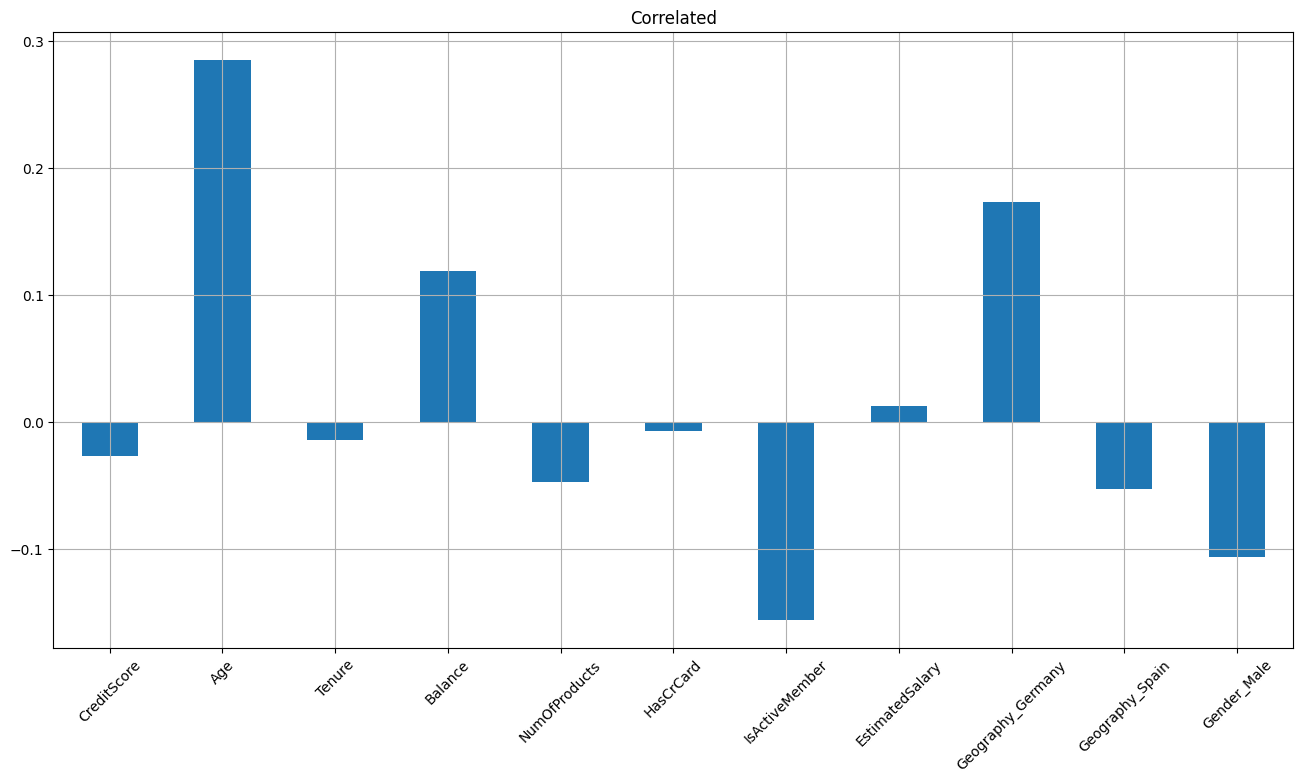

In [20]:
x.corrwith(dataset['Exited']).plot.bar(figsize=(16, 8), title = "Correlated", rot=45, grid=True)


##### Here we can see the most influential correlation of the churn rate with:
####  - Age
##### - Active membership
#####  - Geography

<Axes: >

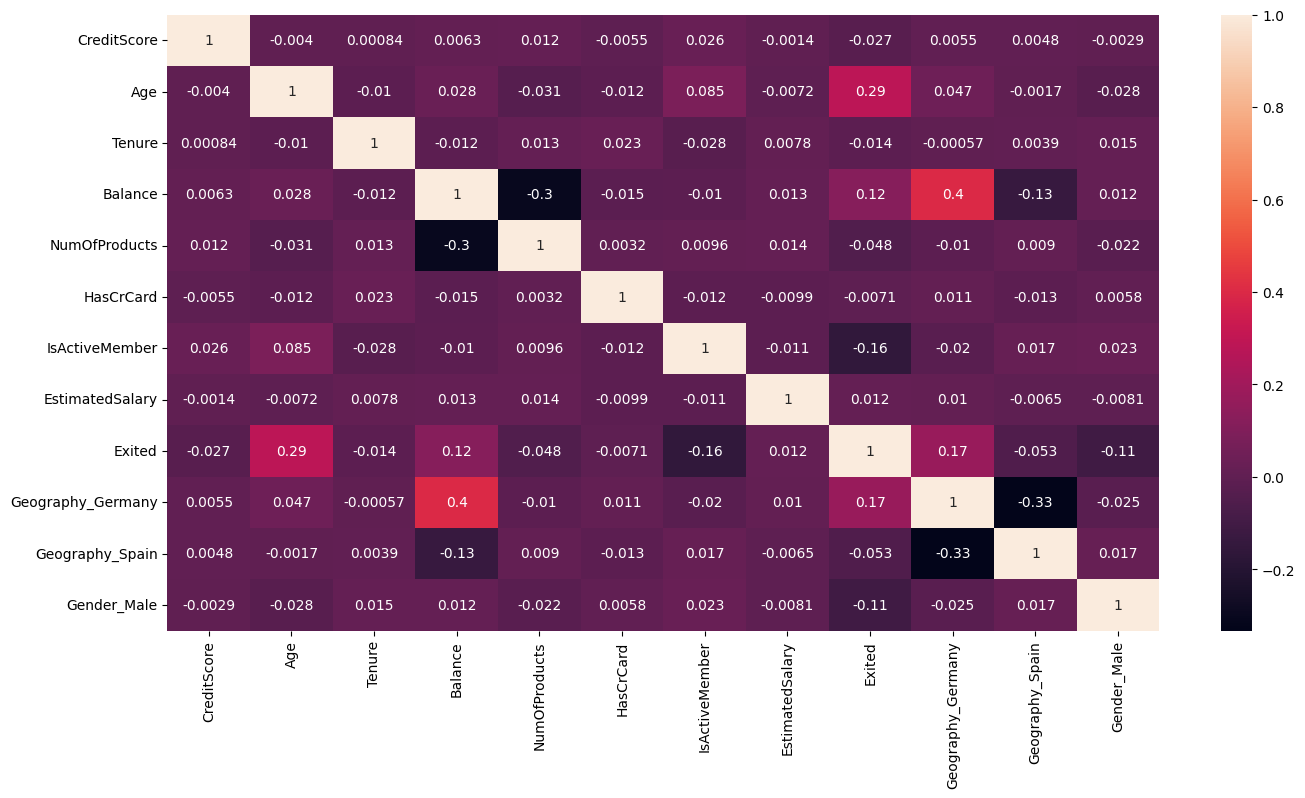

In [21]:
# Heatmap

corr = dataset.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)

In [22]:
# Splitting the dataset into the test and train set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [23]:
## Scaling the Data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [25]:
x_test


array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Building the model



In [26]:
model = tf.keras.models.Sequential()


In [27]:
x_train.shape

(8000, 11)

In [28]:
# First input layer

model.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=11))

In [29]:
# Second hidden layer

model.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [30]:
# Third output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [31]:
# Compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Fitting the model to the dataset

model.fit(x_train, y_train.to_numpy(), batch_size=10, epochs=20)

Epoch 1/20
800/800 [==============================] - 2s 1ms/step - loss: 0.5174 - accuracy: 0.7756
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8026
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.4098 - accuracy: 0.8219
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3899 - accuracy: 0.8353
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3735 - accuracy: 0.8462
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3629 - accuracy: 0.8526
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8530
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3533 - accuracy: 0.8562
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8584
Epoch 10/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3476 - accuracy: 0.8581

# Evaluating the model¶


In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test.to_numpy())

print('test accuracy:{}'.format(test_accuracy))

63/63 [==============================] - 0s 981us/step - loss: 0.3338 - accuracy: 0.8625
test accuracy:0.862500011920929


In [35]:
# Making a prediction

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

63/63 [==============================] - 0s 937us/step


In [36]:
# Checking predictions

y_pred[220], y_test[220]


(array([0]), 0)

In [37]:
# Building a confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1520   75]
 [ 200  205]]


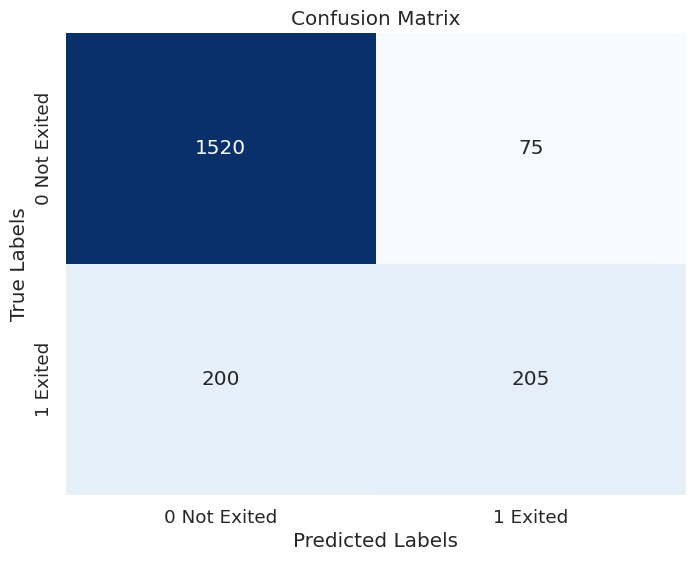

In [38]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 Not Exited', '1 Exited'],
            yticklabels=['0 Not Exited', '1 Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()